In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
# sigmoid 함수
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [3]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2  Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])  
                        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    # 손실함수
    def feed_forward(self):
        delta = 1e-7    # log 무한대 발산 방지
    
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    # 손실 값 계산
    def loss_val(self):
        delta = 1e-7    # log 무한대 발산 방지
    
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
   
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
    
        return predicted_num
    
    # 정확도 측정함수
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        # temp list which contains label and prediction in sequence
        temp_list = []
        
        for index in range(len(input_data)):
                        
            label = int(target_data[index])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (input_data[index, :] / 255.0 * 0.99) + 0.01
            
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌            
            predicted_num = self.predict(np.array(data, ndmin=2))
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(label)
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        print("Current Accuracy = ", len(matched_list)/(len(input_data)) )
        
        return matched_list, not_matched_list, index_label_prediction_list
    
        
    # 수치미분을 이용하여 손실함수가 최소가 될때 까지 학습하는 함수
    def train(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)          
        self.b3 = self.b3 - self.learning_rate * loss_3  
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)         
        self.b2 = self.b2 - self.learning_rate * loss_2
        
#         f = lambda x : self.feed_forward()
        
#         self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
    
#         self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)
        
#         self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
    
#         self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)

In [4]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 training data 읽어옴
training_data = np.loadtxt('./(191110)mnist_train.csv', delimiter=',', dtype=np.float32)

print("training_data.shape = ", training_data.shape)
print("training_data[0,0] = ", training_data[0,0], ", len(training_data[0]) = ", len(training_data[0]))

training_data.shape =  (60000, 785)
training_data[0,0] =  5.0 , len(training_data[0]) =  785


### 예제 1 오차역전파를 이용한 NeuralNetwork class 구현 및 검증

In [5]:
# hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 100     # hidden 1 nodes
o_nodes = 10       # output nodes
lr = 0.1           # learning rate
epochs = 1         # epochs

# 손실함수 값을 저장할 list 생성
loss_val_list = []

nn = NeuralNetwork(i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    for step in range(len(training_data)):  # train
    
        # input_data, target_data normalize        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )
    
        if step % 1000 == 0:
            print("epochs = ", i, ", step = ", step,  ", current loss_val = ", nn.loss_val())
        
        # 손실함수 값 저장
        loss_val_list.append(nn.loss_val())        
        
end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time) 

epochs =  0 , step =  0 , current loss_val =  8.00314311235365
epochs =  0 , step =  1000 , current loss_val =  1.6964644031170626
epochs =  0 , step =  2000 , current loss_val =  2.1992488979762292
epochs =  0 , step =  3000 , current loss_val =  2.3504002425775963
epochs =  0 , step =  4000 , current loss_val =  1.0622835493462661
epochs =  0 , step =  5000 , current loss_val =  0.863694846802735
epochs =  0 , step =  6000 , current loss_val =  0.6433972434056352
epochs =  0 , step =  7000 , current loss_val =  2.1475142624363337
epochs =  0 , step =  8000 , current loss_val =  0.6679822655063562
epochs =  0 , step =  9000 , current loss_val =  0.9710774568769489
epochs =  0 , step =  10000 , current loss_val =  0.6450909839282262
epochs =  0 , step =  11000 , current loss_val =  0.6952766808990888
epochs =  0 , step =  12000 , current loss_val =  0.7984257047915649
epochs =  0 , step =  13000 , current loss_val =  0.8945980641925655
epochs =  0 , step =  14000 , current loss_val =  

In [6]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴
test_data = np.loadtxt('./(191110)mnist_test.csv', delimiter=',', dtype=np.float32)

test_input_data = test_data[ : , 1: ]
test_target_data = test_data[ : , 0 ]

print("test_data.shape = ", test_data.shape)
print("test_data[0,0] = ", test_data[0,0], ", len(test_data[0]) = ", len(test_data[0]))

# measure accuracy
(true_list, false_list, index_label_prediction_list) = nn.accuracy(test_input_data, test_target_data)   

test_data.shape =  (10000, 785)
test_data[0,0] =  7.0 , len(test_data[0]) =  785
Current Accuracy =  0.9294


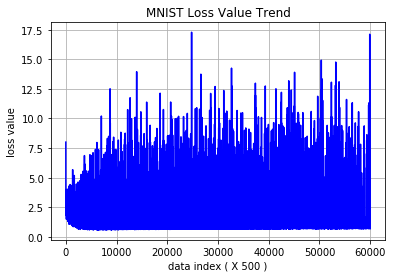

In [19]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list)):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500 )')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()

### 예제 2 최소/최대 손실값 구한 후 데이터 확인

In [8]:
max_loss = np.max(loss_val_list)
min_loss = np.min(loss_val_list)
max_loss_index = np.argmax(loss_val_list)
min_loss_index = np.argmin(loss_val_list)

print("max_loss = ", max_loss, ", max_loss_index = ", max_loss_index, ", min_loss = ", min_loss, ", min_loss_index = ", min_loss_index)

max_loss =  17.285535901786428 , max_loss_index =  24798 , min_loss =  0.5853069672062766 , min_loss_index =  6529


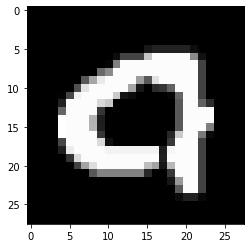

label =  4.0


In [12]:
# check max loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[max_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()
print("label = ", training_data[max_loss_index, 0]) ## 실제 정답 값

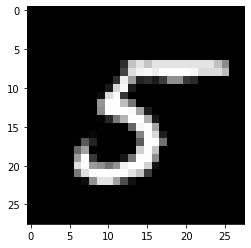

label =  5.0


In [10]:
# check min loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[min_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

print("label = ", training_data[min_loss_index, 0])